In [73]:
import numpy as np
import scipy.misc as misc
import scipy.stats as stats
import scipy.linalg as linalg
import os
import sys
import matplotlib.pyplot as plt 
%matplotlib inline
from skimage.measure import compare_ssim 
sys.path.append(os.path.expanduser('~/Documents/zhenlinx/code/2017Summer/utils'))
from CORAL import image_adapt
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000                                                                                             

In [13]:
source_city_name = "Norfolk"
target_city_name = "Seekonk"
IMAGE_PATH = os.path.expanduser("~/Documents/data/building")

source_image_file = '{}_{:0>2}'.format(source_city_name, 1)
source_image = misc.imread(os.path.join(IMAGE_PATH, source_city_name, "{}_RGB.png".format(source_image_file)))

target_image_file = '{}_{:0>2}'.format(target_city_name, 2)
target_image = misc.imread(os.path.join(IMAGE_PATH, target_city_name, "{}_RGB.png".format(target_image_file)))

# source_image = misc.imresize(source_image, target_image.shape)

# ssim = compare_ssim(source_image, target_image, multichannel=True)
# print(ssim)
source_image_adapted = image_adapt(source_image, target_image, 1)
# print(compare_ssim(source_image_adapted, target_image, multichannel=True))

In [71]:
def colorHist(image, bins=256, norm = True, draw = True, fig_title="RGB Histogram"):
    hist_r, bin_edges = np.histogram(image[:,:,0], bins=bins, density=True)
    hist_g, bin_edges = np.histogram(image[:,:,1], bins=bins, density=True)
    hist_b, bin_edges = np.histogram(image[:,:,2], bins=bins, density=True)
    
    if norm:
        hist_r = hist_r/hist_r.sum()
        hist_g = hist_g/hist_g.sum()
        hist_b = hist_b/hist_b.sum()
    
    if draw:
        plt.figure()
        plt.title(fig_title)
        plt.xlabel("Bins")
        plt.ylabel("Number of Pixels({})".format("Normalized" if norm else "Unnormalized"))
        plt.plot(bin_edges[1:], hist_r, 'r')
        plt.plot(bin_edges[1:], hist_g, 'g')
        plt.plot(bin_edges[1:], hist_b, 'b')
        plt.xlim([0, 256])
    
    return [hist_r, hist_g, hist_b], bin_edges

# compare two color image by compare the distance of their histogram using the histogram intersection metric
def hist_comp(image_1, image_2, num_bins = 32):
    from medpy.metric.histogram import histogram_intersection_1

    hist_1, bin_edges = colorHist(image_1, bins=num_bins, fig_title="Source Histogram", draw = False)

    hist_2, bin_edges = colorHist(image_2, bins=num_bins, fig_title="Target Histogram", draw = False)

    return (histogram_intersection(hist_1[0], hist_2[0]) + 
            histogram_intersection(hist_1[1], hist_2[1]) + 
            histogram_intersection(hist_1[0], hist_2[0]))/3


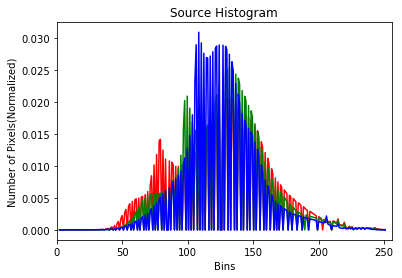

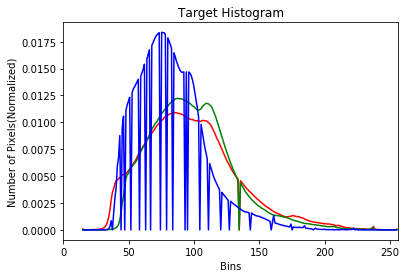

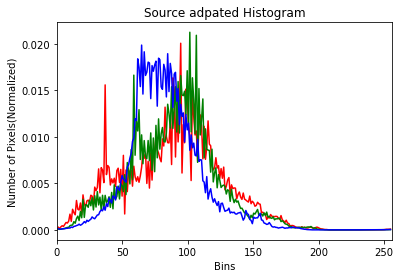

In [106]:
bin_num = 256
hist_source, bin_edges = colorHist(source_image, bins=bin_num, fig_title="Source Histogram")

hist_target, bin_edges = colorHist(target_image, bins=bin_num, fig_title="Target Histogram")

hist_source_adapted, bin_edges = colorHist(source_image_adapted, bins=bin_num, fig_title="Source adpated Histogram")


In [77]:
from matplotlib.colors import rgb_to_hsv
    

In [55]:

bin_num = 32

hist_source, bin_edges = colorHist(source_image, bins=bin_num, fig_title="Source Histogram")

hist_target, bin_edges = colorHist(target_image, bins=bin_num, fig_title="Target Histogram")

hist_source_adapted, bin_edges = colorHist(source_image_adapted, bins=bin_num, fig_title="Source adpated Histogram")



0.87634763999999998

In [88]:
city_list = ['Norfolk', 'Arlington', 'Atlanta', 'Austin', 'Seekonk', 'NewHaven']
train_file_list = []
test_file_list=[]
IMAGE_PATH = os.path.expanduser("~/Documents/data/building")

metric_orginal = np.zeros([17,6])
metric_adapted = np.zeros([17,6])
for i, train_city_name in enumerate(city_list): # source image is the training image
    train_image_file = '{}_{:0>2}'.format(train_city_name, 1)
    train_file_list.append(train_image_file)
    train_image = misc.imread(os.path.join(IMAGE_PATH, train_city_name, "{}_RGB.png".format(train_image_file)))
    for j, test_city_name in enumerate(city_list):
        for k in range(1,4):
            
            # NewHaven has 2 images
            if k ==3 and test_city_name == 'NewHaven':
                break
                
            test_image_file = '{}_{:0>2}'.format(test_city_name, k)
            test_file_list.append(test_image_file)
            test_image = misc.imread(os.path.join(IMAGE_PATH, test_city_name, "{}_RGB.png".format(test_image_file)))
            

            train_image_adapted = image_adapt(train_image, test_image, 1)
        
#             ssim = compare_ssim(source_image, target_image, multichannel=True)
#             ssim = compare_ssim(source_image_adapted, target_image, multichannel=True)
            hist_metric = hist_comp(train_image, test_image, num_bins = 32)
            hist_metric_adapted = hist_comp(train_image_adapted, test_image, num_bins = 32)
            
            metric_orginal[j*3+k-1, i] = hist_metric
            metric_adapted[j*3+k-1, i] = hist_metric_adapted
            print("Histogram similarity between {} and {}: {} and after adapted {}"
                  .format(train_image_file,test_image_file, hist_metric, hist_metric_adapted))

Histogram similarity between Norfolk_01 and Norfolk_01: 1.0 and after adapted 0.963873666667
Histogram similarity between Norfolk_01 and Norfolk_02: 0.891448066667 and after adapted 0.904080866667
Histogram similarity between Norfolk_01 and Norfolk_03: 0.926725626667 and after adapted 0.923381733333
Histogram similarity between Norfolk_01 and Arlington_01: 0.60414604 and after adapted 0.86291908
Histogram similarity between Norfolk_01 and Arlington_02: 0.60191624 and after adapted 0.872893413333
Histogram similarity between Norfolk_01 and Arlington_03: 0.6159318 and after adapted 0.85631908
Histogram similarity between Norfolk_01 and Atlanta_01: 0.678960183889 and after adapted 0.807257041667
Histogram similarity between Norfolk_01 and Atlanta_02: 0.506884336111 and after adapted 0.773750728889
Histogram similarity between Norfolk_01 and Atlanta_03: 0.667521656667 and after adapted 0.806126528889
Histogram similarity between Norfolk_01 and Austin_01: 0.656102354319 and after adapted 0.

In [89]:
print(metric_adapted)

[[ 0.96387367  0.82361248  0.71936426  0.77316959  0.86722103  0.89324185]
 [ 0.90408087  0.84898325  0.77582171  0.82059331  0.8902798   0.87261549]
 [ 0.92338173  0.83474856  0.78869485  0.7914317   0.89253987  0.91521893]
 [ 0.86291908  0.98247913  0.82370317  0.91467959  0.89354015  0.86531817]
 [ 0.87289341  0.93198584  0.85616692  0.94693092  0.92869124  0.90189095]
 [ 0.85631908  0.86585477  0.87048358  0.90549683  0.93123632  0.89530597]
 [ 0.80725704  0.82374405  0.93247493  0.8633515   0.86054432  0.83025691]
 [ 0.77375073  0.78538341  0.88372551  0.79631542  0.82227416  0.82544696]
 [ 0.80612653  0.82005502  0.8870549   0.85339114  0.860305    0.81701823]
 [ 0.86436261  0.91252183  0.86341712  0.99158643  0.9237241   0.88699136]
 [ 0.87812323  0.92061966  0.86591255  0.96942692  0.93549167  0.89364564]
 [ 0.89190023  0.91959568  0.84402567  0.92414298  0.91620118  0.90734083]
 [ 0.88206488  0.90283533  0.88936711  0.93955397  0.98947913  0.92090556]
 [ 0.86558119  0.89780401

TypeError: set_xticks() got an unexpected keyword argument 'rotation'

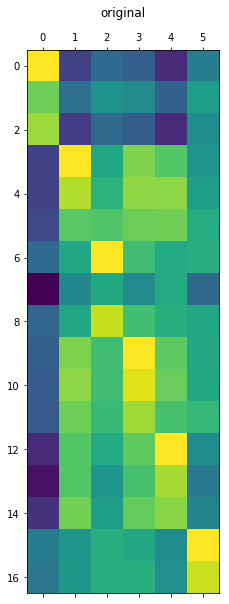

In [105]:
metric_matrix = np.matrix(metric_orginal)
metric_matrix_adpated = np.matrix(metric_adapted)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(121)

cax1 = ax1.matshow(metric_matrix)
cax2 = ax2.matshow(metric_matrix_adpated)

ax1.set_title("original")
ax2.set_title("Adapted")

# x_tick_marks = np.arange(len(train_file_list))
# y_tick_marks = np.arange(len(test_file_list))
# ax1.set_xticks(x_tick_marks, train_file_list, rotation=45)
# ax1.set_yticks(y_tick_marks, test_file_list)
